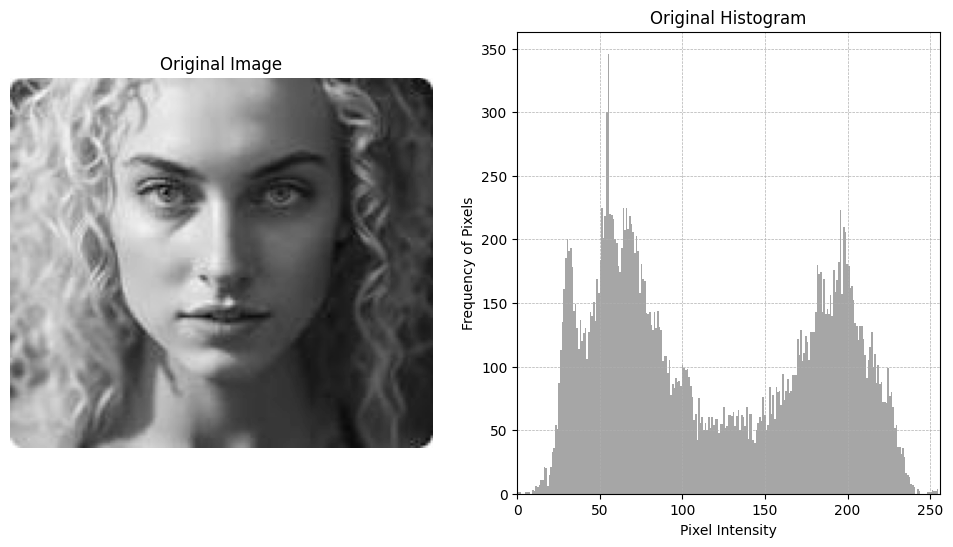

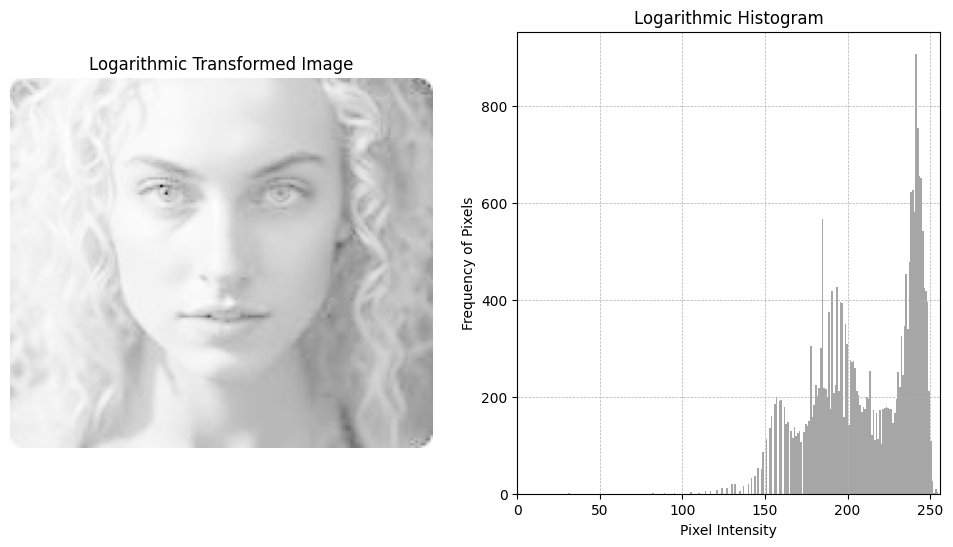

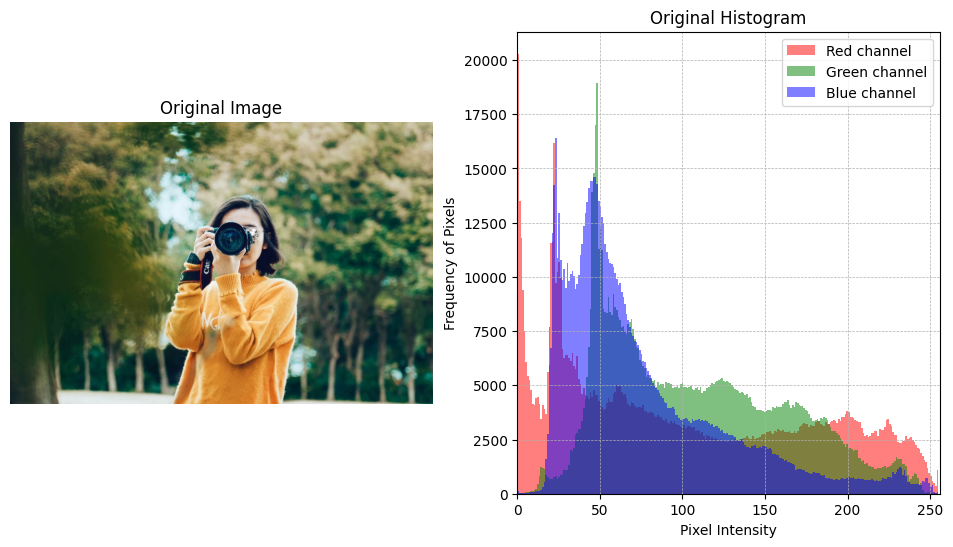

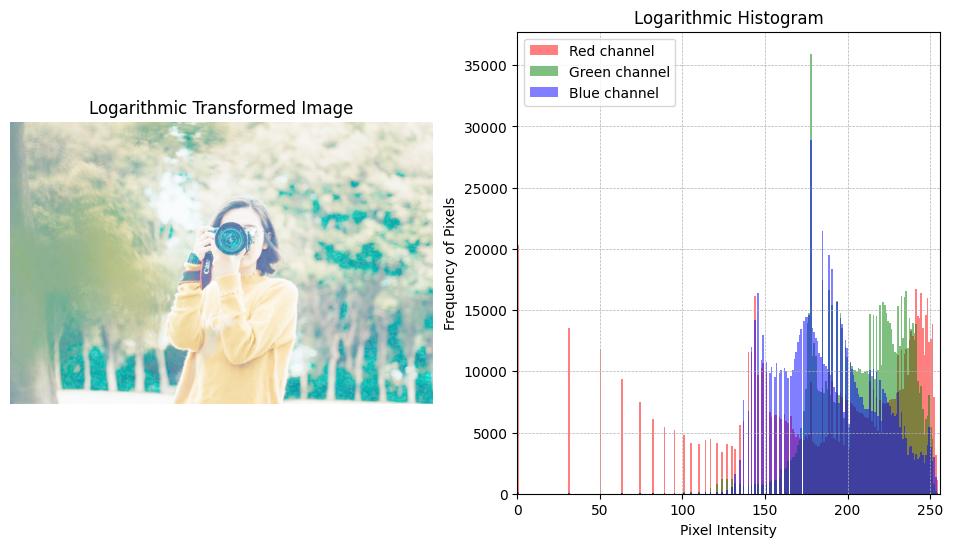

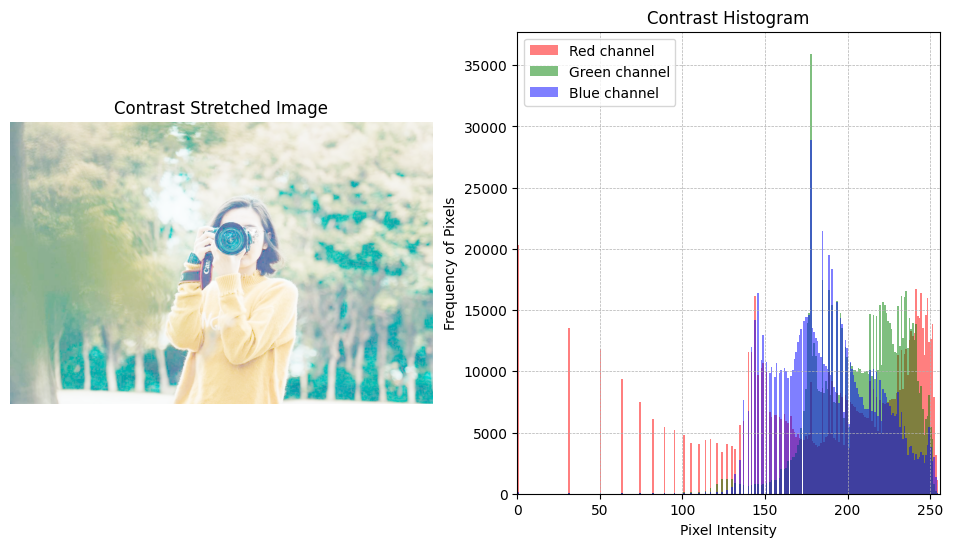

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(path, grayscale=False):
    if grayscale:
        return cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    else:
        return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def display_image_and_histogram(image, title="Image", histogram_title="Histogram"):
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.title(title)
    plt.axis('off')


    plt.subplot(1, 2, 2)
    if len(image.shape) == 2:
        plt.hist(image.ravel(), bins=256, color='gray', alpha=0.7)
    else:
        for i, color in enumerate(['red', 'green', 'blue']):
            plt.hist(image[:, :, i].ravel(), bins=256, color=color, alpha=0.5, label=f'{color.capitalize()} channel')
        plt.legend()

    plt.title(histogram_title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency of Pixels')
    plt.xlim([0, 256])
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

def logarithmic_transformation(image, c=1):

    if image.dtype != np.uint8:
        raise ValueError("Image should be of type np.uint8")


    image = np.array(image, dtype='float32')
    image = c * np.log(1 + image)


    image = 255 * (image - np.min(image)) / (np.max(image) - np.min(image))
    return image.astype(np.uint8)

# First Image
image_path = '../images/greyscale.jpeg'
image = load_image(image_path, grayscale=True)


log_image = logarithmic_transformation(image)
display_image_and_histogram(image, "Original Image", "Original Histogram")
display_image_and_histogram(log_image, "Logarithmic Transformed Image", "Logarithmic Histogram")


# Second Image
image_path = '../images/rgb.jpg'
image = load_image(image_path, grayscale=False)


log_image = logarithmic_transformation(image)
display_image_and_histogram(image, "Original Image", "Original Histogram")
display_image_and_histogram(log_image, "Logarithmic Transformed Image", "Logarithmic Histogram")

contrast_image = logarithmic_transformation(image)
display_image_and_histogram(contrast_image, "Contrast Stretched Image", "Contrast Histogram")